In [2]:
import random

import numpy as np
import matplotlib.pyplot as plt
import numpy.random
from scipy.optimize import curve_fit
from scipy.stats import norm
import pandas as pd

a) Implement a random walk in two dimensions. The random walk should start at the origin, (x0, y0) = (0, 0). For each step, choose uniform random values for ∆x′ and ∆y′ in the range [−1, 1). Then normalise the step to be of unit length:
$∆x = \frac{1}{L} ∆x′, ∆y =\frac{1}{L}∆y′, L = \sqrt{∆x′^2 + ∆y′^2}$ 
Draw 2D plots of three independent random walks, each with N = 1000 steps.



Text(0.5, 1.0, 'Random walk')

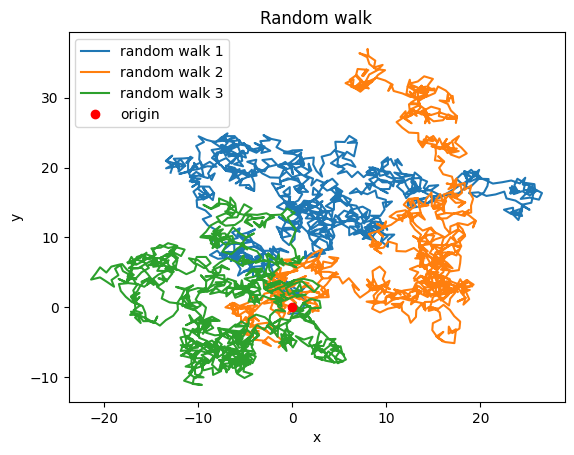

In [3]:
def random_walk(N, x_0, y_0):
    list_dx = np.random.uniform(-1,1,N)
    list_dy = np.random.uniform(-1,1,N)
    list_L = [np.sqrt(list_dx[i]**2 + list_dy[i]**2) for i in range(N)]
    list_dx = np.array(list_dx/list_L)
    list_dy = np.array(list_dy/list_L)
    list_x = [x_0]
    list_y = [y_0]
    for i in range(N):
        list_x.append(list_x[-1]+list_dx[i])
        list_y.append(list_y[-1]+list_dy[i])
    return list_x, list_y

np.random.seed(42)       
x1,y1 = random_walk(1000,0,0)
np.random.seed(1)
x2,y2 = random_walk(1000,0,0)
np.random.seed(10)
x3, y3=random_walk(1000,0,0)

plt.plot(x1,y1, label = "random walk 1")
plt.plot(x2,y2, label="random walk 2")
plt.plot(x3, y3, label= "random walk 3")
plt.plot(0,0, "ro", label="origin")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Random walk")

b) Now perform $M = 1000$ independent simulations with $N = 10000$. Plot a histogram of the distance from the origin after the last step, $R_N$ . Compare the root-mean-square distance $R_{rms,N} = \sqrt{⟨R^2⟩_N}$ to the theoretical expectation of $R_{rms} = \sqrt{N} * r_{rms}$ for large $N$, where $r_{rms} = 1$ given our unit step size.

In [14]:
def R(x,y, x_0=0, y_0=0):
    dx = x-x_0
    dy = y-y_0
    return np.sqrt(dx**2 + dy**2)

def rms(vals):
    list_sq = [r**2 for r in vals]
    return np.sqrt(np.mean(list_sq))


n = 10000
m = 1000

list_R = []

seeds = np.load("seeds_1000.npy")
for i in range(m):
    np.random.seed(seeds[i])
    xm, ym = random_walk(n, 0, 0)
    list_R.append(R(xm[-1],ym[-1]))

98.37947199861001
100.0


Text(0, 0.5, 'Frequency')

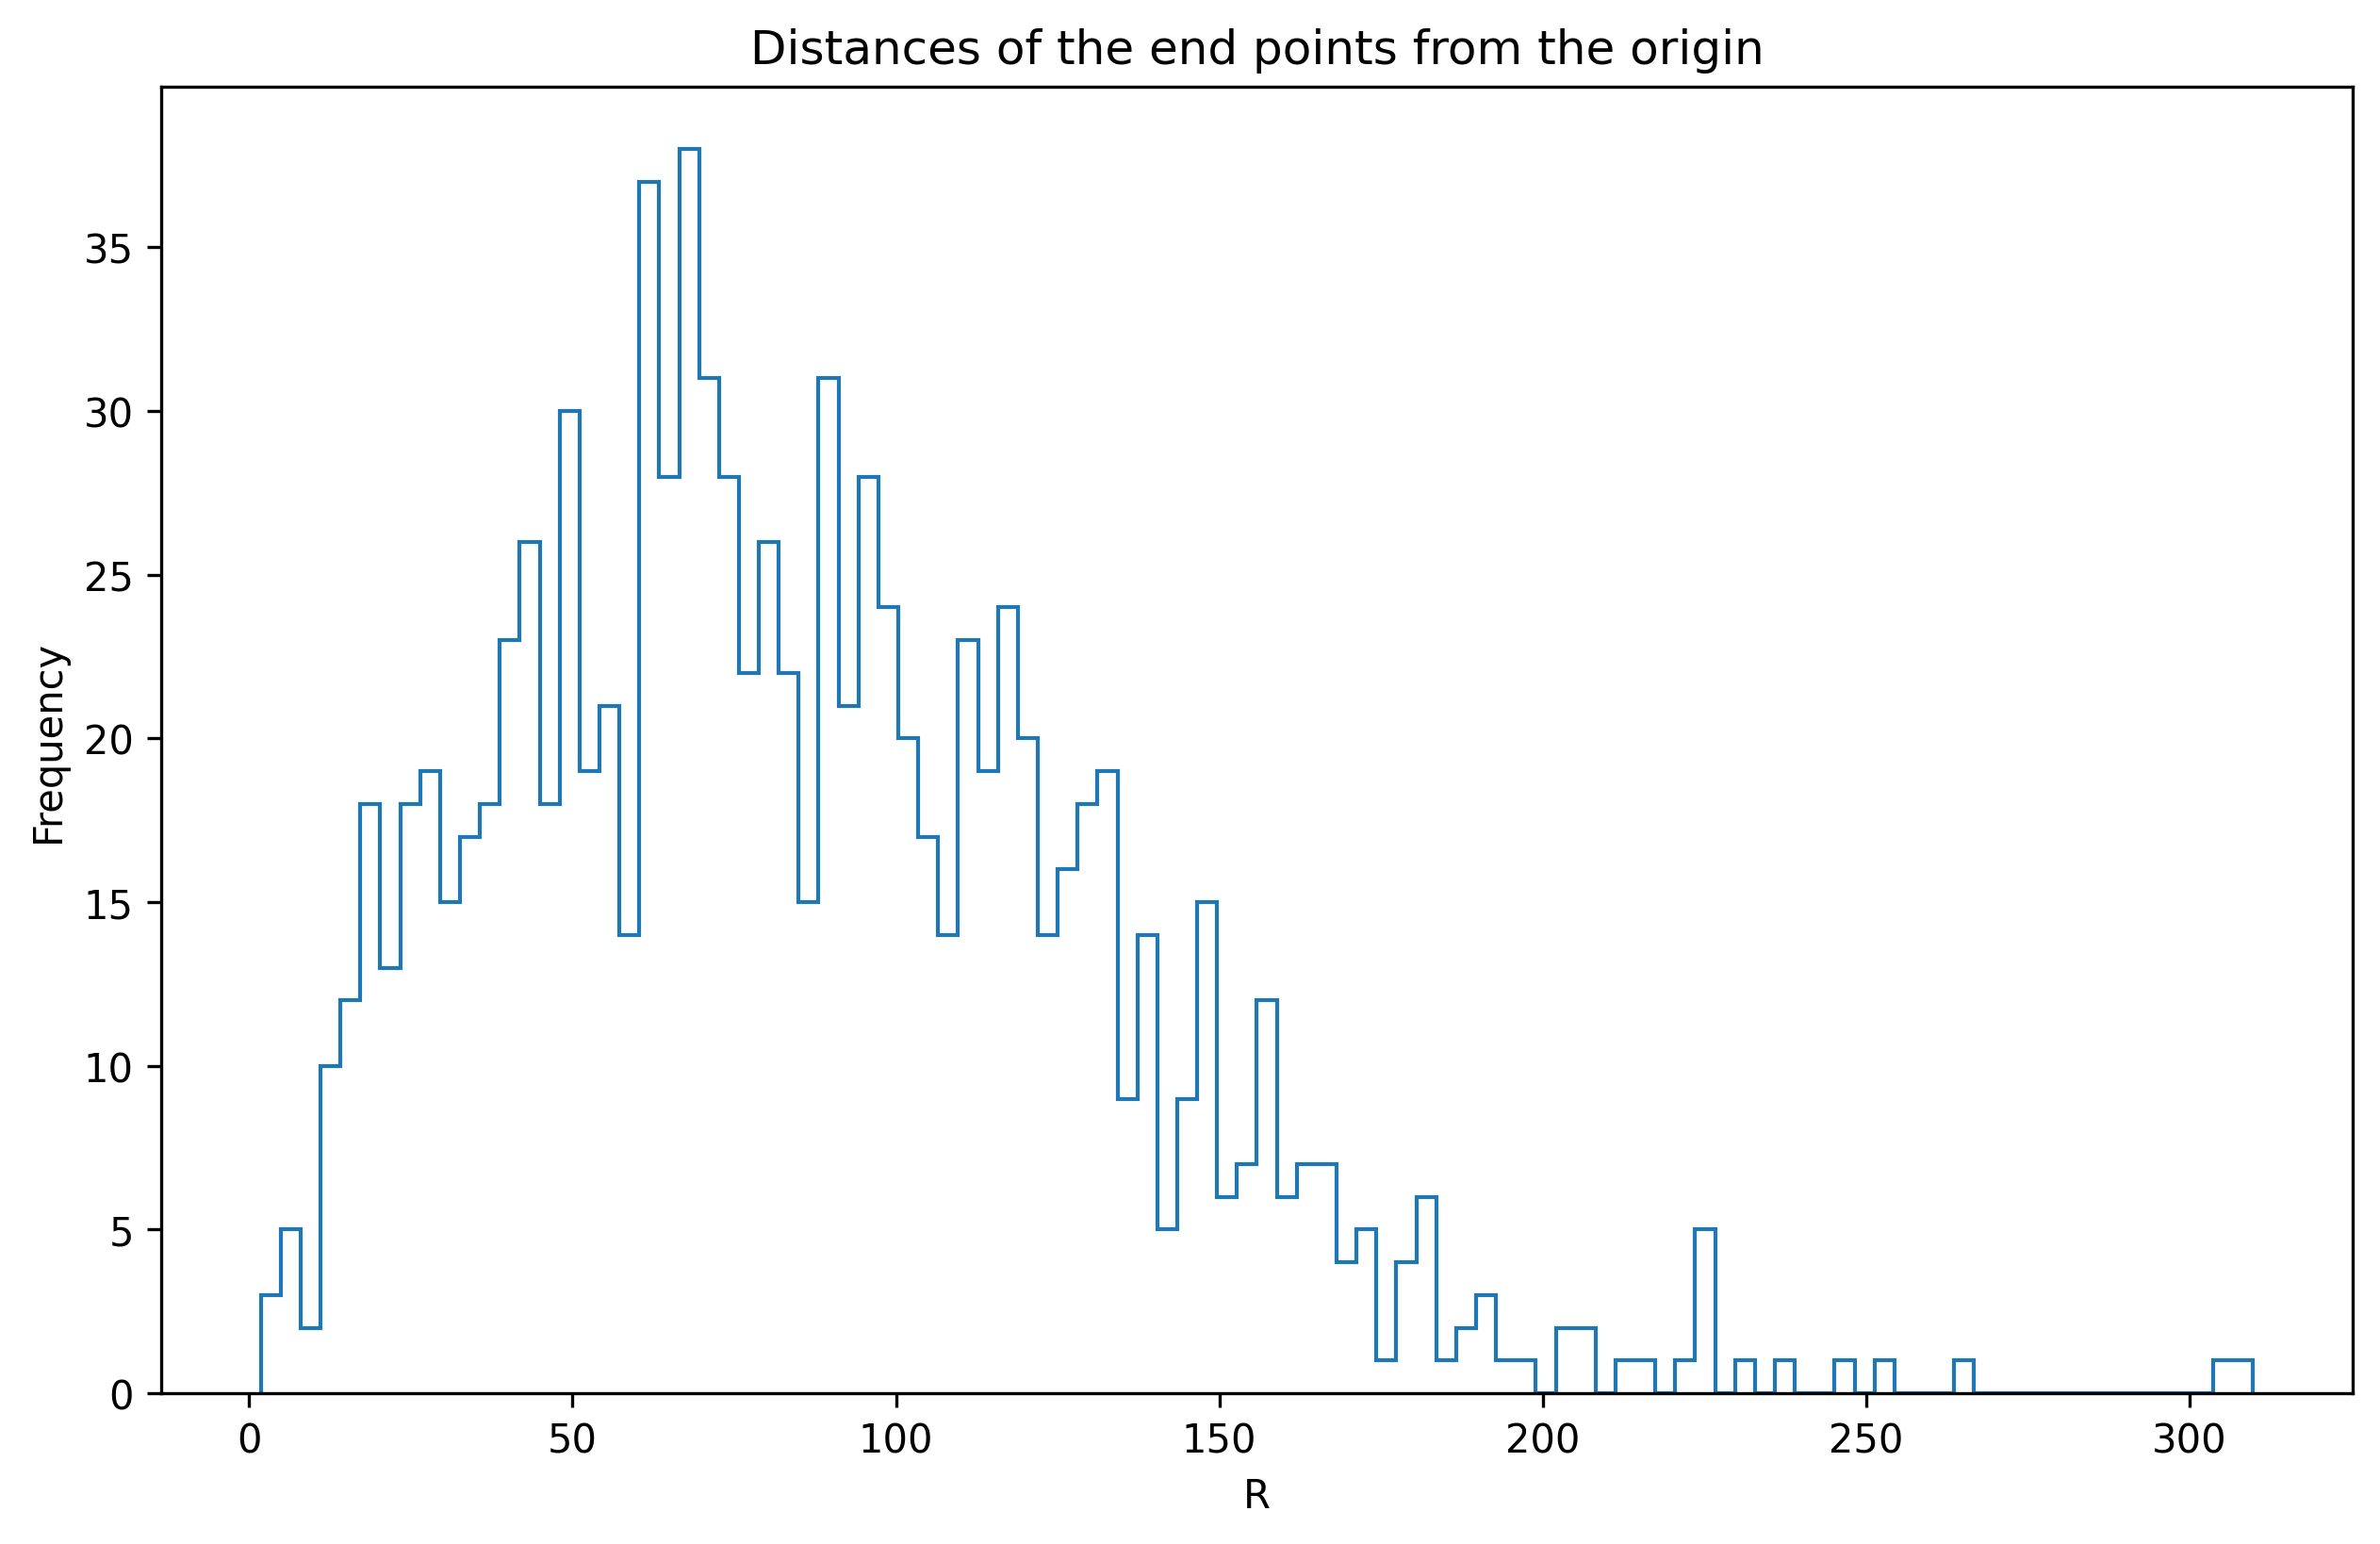

In [15]:
vals, bins = np.histogram(list_R, bins=100)

fig = plt.figure(figsize=(10, 6), dpi=300)
plt.stairs(vals, bins, label="histogram")
plt.title("Distances of the end points from the origin")
plt.xlabel("R")
plt.ylabel("Frequency")

In [16]:
print(rms(list_R))
print(np.sqrt(n))
print("Comparison:")

98.37947199861001
100.0
Comparison:
